# 1. Data Loading & Transforming

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#DATA_DIR = Path("data/raw/")
DATA_DIR = Path("sample_data")

annotated_path = DATA_DIR / "linkedin-cvs-annotated.json"
not_annotated_path = DATA_DIR / "linkedin-cvs-not-annotated.json"
department_path = DATA_DIR / "department-v2.csv"
seniority_path = DATA_DIR / "seniority-v2.csv"

In [4]:
with open(annotated_path, "r", encoding="utf-8") as f:
    cvs_annotated = json.load(f)

with open(not_annotated_path, "r", encoding="utf-8") as f:
    cvs_not_annotated = json.load(f)

department_df = pd.read_csv(department_path)
seniority_df = pd.read_csv(seniority_path)

## 1.1 Label Datasets (department labels & seniority labels)

We load the department and seniority files into dataframes

In [5]:
department_df.info()
department_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10145 entries, 0 to 10144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10145 non-null  object
 1   label   10145 non-null  object
dtypes: object(2)
memory usage: 158.6+ KB


(10145, 2)

Department labels file has 10.145 rows and 2 columns

In [6]:
seniority_df.info()
seniority_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9428 entries, 0 to 9427
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9428 non-null   object
 1   label   9428 non-null   object
dtypes: object(2)
memory usage: 147.4+ KB


(9428, 2)

Seniority labels file has 9.428 rows and 2 columns

In [7]:
department_df.nunique()

,0
text,10145
label,11


In [8]:
department_df['label'].value_counts()

,count
label,
Marketing,4295
Sales,3328
Information Technology,1305
Business Development,620
Project Management,201
Consulting,167
Administrative,83
Other,42
Purchasing,40


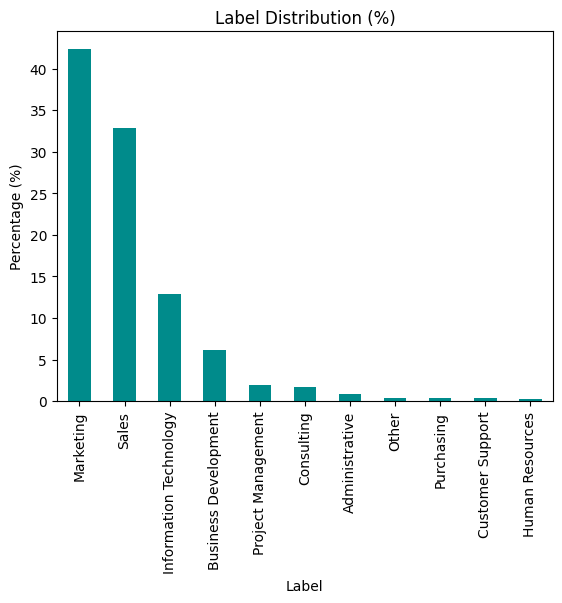

In [9]:
dep_percentages = department_df['label'].value_counts(normalize=True) * 100

dep_percentages.plot(kind='bar', color='DarkCyan')

plt.xlabel('Label')
plt.ylabel('Percentage (%)')
plt.title('Label Distribution (%)')
plt.grid(False)
#plt.tight_layout()
plt.show()

There are 11 distinct department labels. Among them, Marketing is the most common, followed by Sales and Information Technology. Very rare are the labels Other, Purchasing, Customer Support, with Human Resources being the most rare.

In [10]:
seniority_df['label'].value_counts()

,count
label,
Senior,3733
Lead,3546
Director,984
Management,756
Junior,409


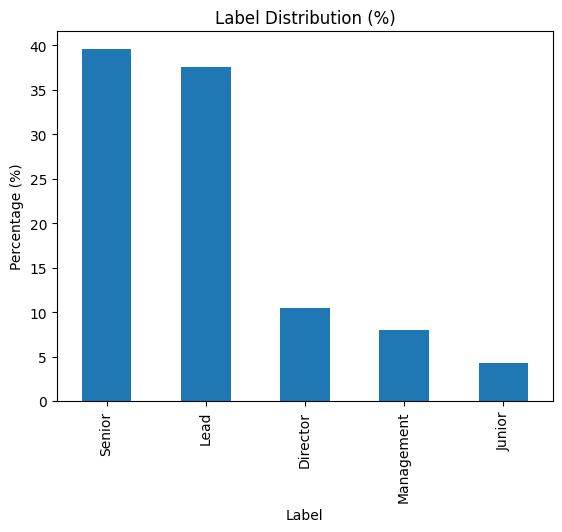

In [11]:
sen_percentages = seniority_df['label'].value_counts(normalize=True) * 100

sen_percentages.plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Percentage (%)')
plt.title('Label Distribution (%)')
plt.grid(False)
#plt.tight_layout()
plt.show()

There are 5 distinct seniority level labels. Among them, Senior is the most common, followed by Lead. Director, Management are less common and Junior the least.

In [12]:
print("\nDepartment labels:")
display(department_df.head(10))

print("\nSeniority labels:")
display(seniority_df.head(10))


Department labels:


,text,label
0,Adjoint directeur communication,Marketing
1,Advisor Strategy and Projects,Project Management
2,Beratung & Projekte,Project Management
3,Beratung & Projektmanagement,Project Management
4,Beratung und Projektmanagement kommunale Partner,Project Management
5,Cadre marketing digital,Marketing
6,Chargé de communication,Marketing
7,Chargé de communication digitale,Marketing
8,Chargé de communication et marketing,Marketing
9,Chargé de Webmarketing SEO/SEA,Marketing



Seniority labels:


,text,label
0,Analyst,Junior
1,Analyste financier,Junior
2,Anwendungstechnischer Mitarbeiter,Junior
3,Application Engineer,Senior
4,Applications Engineer,Senior
5,Architecte SI - Chef de projet Applicatif,Lead
6,Associate,Junior
7,Associate - Research,Junior
8,Associate Partner,Junior
9,Associate Recruiter,Junior


With this quick overview we can already see that in the Label Lists the job titles are of different word lengths, in upper and lowercase, in different languages and can contain spacing characters such as *&* or *-* or */*

## 1.2 CV Datasets (annotated & not annotated)

In [13]:
type(cvs_annotated)

list

In [14]:
type(cvs_not_annotated)

list

Both files are of type list

In [15]:
type(cvs_annotated[0])

list

In [16]:
print(cvs_annotated[0])

[{'organization': 'Depot4Design GmbH', 'linkedin': 'https://www.linkedin.com/company/depot4design-gmbh', 'position': 'Prokurist', 'startDate': '2019-08', 'endDate': None, 'status': 'ACTIVE', 'department': 'Other', 'seniority': 'Management'}, {'organization': 'Depot4Design GmbH', 'linkedin': 'https://www.linkedin.com/company/depot4design-gmbh', 'position': 'CFO', 'startDate': '2019-07', 'endDate': None, 'status': 'ACTIVE', 'department': 'Other', 'seniority': 'Management'}, {'organization': 'Depot4Design GmbH', 'linkedin': 'https://www.linkedin.com/company/depot4design-gmbh', 'position': 'Betriebswirtin', 'startDate': '2019-07', 'endDate': None, 'status': 'ACTIVE', 'department': 'Other', 'seniority': 'Professional'}, {'organization': 'Depot4Design GmbH', 'linkedin': 'https://www.linkedin.com/company/depot4design-gmbh', 'position': 'Prokuristin', 'startDate': '2019-07', 'endDate': None, 'status': 'ACTIVE', 'department': 'Other', 'seniority': 'Management'}, {'organization': 'Depot4Design G

In [17]:
type(cvs_not_annotated[0])

list

In [18]:
print(cvs_not_annotated[0])

[{'organization': 'Keeping The Books, Bookkeeping', 'linkedin': '', 'position': 'Bookkeeper', 'startDate': '2023-03', 'endDate': None, 'status': 'ACTIVE'}, {'organization': 'Playful Paws', 'linkedin': '', 'position': 'Co-Owner', 'startDate': '2018-11', 'endDate': None, 'status': 'ACTIVE'}, {'organization': 'S&R services', 'linkedin': '', 'position': 'Logistics Officer', 'startDate': '2019-09', 'endDate': '2024-04', 'status': 'INACTIVE'}, {'organization': 'ABC Supply Co. Inc.', 'linkedin': 'https://www.linkedin.com/company/abc-supply', 'position': 'Truck driver/ laborer', 'startDate': '2019-03', 'endDate': '2019-09', 'status': 'INACTIVE'}, {'organization': 'MB Railways', 'linkedin': '', 'position': 'Fuel Driver', 'startDate': '2018-03', 'endDate': '2019-03', 'status': 'INACTIVE'}, {'organization': 'Sysco', 'linkedin': 'https://www.linkedin.com/company/sysco', 'position': 'Food Delivery Driver', 'startDate': '2017-10', 'endDate': '2018-02', 'status': 'INACTIVE'}, {'organization': 'UPS Fr

Looking at the first element of both files shows us that elements are of type list -> files have a nested structure

In [19]:
type(cvs_annotated[0][0])

dict

In [20]:
print(cvs_annotated[0][0])

{'organization': 'Depot4Design GmbH', 'linkedin': 'https://www.linkedin.com/company/depot4design-gmbh', 'position': 'Prokurist', 'startDate': '2019-08', 'endDate': None, 'status': 'ACTIVE', 'department': 'Other', 'seniority': 'Management'}


In [21]:
type(cvs_not_annotated[0][0])

dict

In [22]:
print(cvs_not_annotated[0][0])

{'organization': 'Keeping The Books, Bookkeeping', 'linkedin': '', 'position': 'Bookkeeper', 'startDate': '2023-03', 'endDate': None, 'status': 'ACTIVE'}


The inner list of both files contains dictionaries

In [23]:
unique_types_level_1 = {type(cv) for cv in cvs_annotated}
unique_types_level_2 = {type(job) for cv in cvs_annotated for job in cv}
unique_types_level_3 = {
    type(v)
    for cv in cvs_annotated
    for job in cv
    for v in job.values()
}

unique_types_level_1, unique_types_level_2, unique_types_level_3

({list}, {dict}, {NoneType, str})

In [24]:
unique_types_level_1_not = {type(cv) for cv in cvs_not_annotated}
unique_types_level_2_not = {type(job) for cv in cvs_not_annotated for job in cv}
unique_types_level_3_not = {
    type(v)
    for cv in cvs_not_annotated
    for job in cv
    for v in job.values()
}

unique_types_level_1_not, unique_types_level_2_not, unique_types_level_3_not

({list}, {dict}, {NoneType, str})

The inspection reveals a three level hierarchical structure. The dataset is a list of CVs, each CV is a list of job entries, and each job entry is a dictionary whith values. Since no job field contains nested lists or dictionaries, the hierarchy ends at the job level

In [25]:
print("Number of annotated CVs:", len(cvs_annotated))
print("Number of non-annotated CVs:", len(cvs_not_annotated))

Number of annotated CVs: 609
Number of non-annotated CVs: 390


In [26]:
print("\nType of one CV object (annotated):", type(cvs_annotated[0]))
print("\nType of one CV object (not annotated):", type(cvs_not_annotated[0]))


Type of one CV object (annotated): <class 'list'>

Type of one CV object (not annotated): <class 'list'>


We have 609 CVs with labels and 390 CVs without labels. Both files are a list of lists, where one CV = list

In [27]:
sum(len(cv) for cv in cvs_annotated)

2638

In [28]:
sum(len(cv) for cv in cvs_not_annotated)

1886

There are 2.638 job titles in the annotated data and 1.886 job titles in the not annotated data

### 1.2.1 Turning the hierarchical CV data into a job-level DataFrame

Because ML models require tabular inputs, we need to transform our hierarchical CV data into a job-level table, where each row represents one job entry

In [29]:
# Collect all unique key sets from annotated jobs
annotated_job_key_sets = {
    tuple(sorted(job.keys()))
    for cv in cvs_annotated
    for job in cv
}

len(annotated_job_key_sets), annotated_job_key_sets

(1,
 {('department',
   'endDate',
   'linkedin',
   'organization',
   'position',
   'seniority',
   'startDate',
   'status')})

In [30]:
not_annotated_job_key_sets = {
    tuple(sorted(job.keys()))
    for cv in cvs_not_annotated
    for job in cv
}

len(not_annotated_job_key_sets), not_annotated_job_key_sets

(1,
 {('endDate', 'linkedin', 'organization', 'position', 'startDate', 'status')})

For that we create the following dataframe schema where each column corresponds to a field (key) from the job dictionary:

- **organization** : name of the employer for a given job
- **position** : job title text
- **startDate** : start date of the job
- **endDate** : end date of the job
- **status** : indicates the status of a job
- **department (annotated dataset only)** : department label for a job
- **seniority (annotated dataset only)** : seniority level for a job

In [31]:
unique_linkedin_values = {
    job.get("linkedin")
    for cv in cvs_annotated
    for job in cv
}

list(unique_linkedin_values)[:10]

['',
 'https://www.linkedin.com/company/speck-systems-ltd_2',
 'https://www.linkedin.com/company/zebconsulting',
 'https://www.linkedin.com/company/deloitte',
 'https://www.linkedin.com/company/ryder-system-inc',
 'https://www.linkedin.com/company/stadt-wiesbaden',
 'https://www.linkedin.com/company/uniserve-group',
 'https://www.linkedin.com/company/headspaceau',
 'https://www.linkedin.com/company/arkadia-management-consultants-gmbh',
 'https://www.linkedin.com/company/spendit-ag']

We remove the linkedin field, because it only contains a URL to a linkedin page. We remove it because this does not contribute meaningful predictive signal for our project and would introduce noise and leakage risk into our pipeline

Because we want to perserve the hierarchy information (CV identity and job order), we explicitly add these columns to our dataframe schema:

- **cv_id** : this links each job back to a CV (unique identifier for each CV)
- **job_index** : this preserves the job order within a CV (position of a job within a CVs job list)

This is necessary because job entries are not independent observations, they belong to the same individual and form a temporal sequence

#### 1.2.1.1 Job-level DataFrame for annotated CVs

The variables *cv_id* and *job_index* are derived from the positional indices of CVs and jobs within the nested list structure using enumerate.

All remaining columns are obtained by directly reading the corresponding fields from each job dictionary using key access

In [32]:
annotated_rows = []

for cv_id, cv in enumerate(cvs_annotated):
    for job_index, job in enumerate(cv):
        annotated_rows.append({
            "cv_id": cv_id,
            "job_index": job_index,
            "organization": job.get("organization"),
            "position": job.get("position"),
            "startDate": job.get("startDate"),
            "endDate": job.get("endDate"),
            "status": job.get("status"),
            "department": job.get("department"),
            "seniority": job.get("seniority"),
        })

jobs_annotated_df = pd.DataFrame(annotated_rows)


In [33]:
jobs_annotated_df.head(20)

,cv_id,job_index,organization,position,startDate,endDate,status,department,seniority
0,0,0,Depot4Design GmbH,Prokurist,2019-08,None,ACTIVE,Other,Management
1,0,1,Depot4Design GmbH,CFO,2019-07,None,ACTIVE,Other,Management
2,0,2,Depot4Design GmbH,Betriebswirtin,2019-07,None,ACTIVE,Other,Professional
3,0,3,Depot4Design GmbH,Prokuristin,2019-07,None,ACTIVE,Other,Management
4,0,4,Depot4Design GmbH,CFO,2019-07,None,ACTIVE,Other,Management
5,0,5,Nagel Car Group,Buchhalterin,2000-05,2019-06,INACTIVE,Other,Professional
6,1,0,Computer Solutions,Solutions Architect,2024-03,None,ACTIVE,Information Technology,Professional
7,1,1,Computer Solutions,Senior Network Engineer,2019-07,2024-03,INACTIVE,Information Technology,Senior
8,1,2,Texas A&M University-Corpus Christi,Manager of Network Services,2017-02,2019-07,INACTIVE,Information Technology,Professional
9,1,3,Texas A&M University-Corpus Christi,Infrastructure Administrator II,2015-06,2017-02,INACTIVE,Information Technology,Professional


Note that job entries within each CV are ordered in reverse chronological order, with job_index = 0 corresponding to the most recent position and increasing indices representing older roles

#### 1.2.1.2 Job-level DataFrame for non-annotated CVs

We set department and seniority as None here

In [34]:
not_annotated_rows = []

for cv_id, cv in enumerate(cvs_not_annotated):
    for job_index, job in enumerate(cv):
        not_annotated_rows.append({
            "cv_id": cv_id,
            "job_index": job_index,
            "organization": job.get("organization"),
            "position": job.get("position"),
            "startDate": job.get("startDate"),
            "endDate": job.get("endDate"),
            "status": job.get("status"),
            "department": None,
            "seniority": None,
        })

jobs_not_annotated_df = pd.DataFrame(not_annotated_rows)


In [35]:
jobs_not_annotated_df.head(10)

,cv_id,job_index,organization,position,startDate,endDate,status,department,seniority
0,0,0,"Keeping The Books, Bookkeeping",Bookkeeper,2023-03,None,ACTIVE,None,None
1,0,1,Playful Paws,Co-Owner,2018-11,None,ACTIVE,None,None
2,0,2,S&R services,Logistics Officer,2019-09,2024-04,INACTIVE,None,None
3,0,3,ABC Supply Co. Inc.,Truck driver/ laborer,2019-03,2019-09,INACTIVE,None,None
4,0,4,MB Railways,Fuel Driver,2018-03,2019-03,INACTIVE,None,None
5,0,5,Sysco,Food Delivery Driver,2017-10,2018-02,INACTIVE,None,None
6,0,6,UPS Freight,Regional driver,2016-10,2017-03,INACTIVE,None,None
7,0,7,Domino's Pizza,delivery/sales/MIT,2012-04,2012-06,INACTIVE,None,None
8,1,0,Erste Bank und Sparkasse,Strategy & Investments,2025-03,None,ACTIVE,None,None
9,1,1,DO & CO AG,International Event Operations Manager,2022-11,2024-05,INACTIVE,None,None


## 1.3 Missing values

Before we inspect, it is important to note that some missing values are expected in our data.

in **jobs_annotated_df**:
- **endDate** = None → expected for active jobs (where status == "ACTIVE")


in **jobs_not_annotated_df**:
- **endDate** = None → expected for active jobs (where status == "ACTIVE")
- **department** = None → expected in the non annotated data
- **seniority** = None → expected in the non annotated data

In [36]:
jobs_annotated_df.isna().sum()

,0
cv_id,0
job_index,0
organization,0
position,0
startDate,118
endDate,741
status,0
department,0
seniority,0


Most columns do not have missing values, except for startDate and endDate

As explained before, the missing values in endDate are expected if status is active. Therefore we want to see if these missing values actually correspond to an active status

In [37]:
enddate_missing_by_status = (
    jobs_annotated_df
    .assign(endDate_missing=jobs_annotated_df["endDate"].isna())
    .groupby("status")["endDate_missing"]
    .value_counts()
)

enddate_missing_by_status

,,count
status,endDate_missing,
ACTIVE,True,623
INACTIVE,False,1897
UNKNOWN,True,118


- there are 623 active jobs whose endDate is missing
- there are 1897 inactive jobs whose endDate is not missing
- there are 118 jobs with unknown status whose endDate is missing

This shows that all missing end dates occur for jobs with status active or unkown, while all inactive jobs have an end date.

So there is no issue with the missing end dates for active jobs and we can leave them as of now, but there are still 118 missing end dates for unknown status jobs.
We noticed that the missing values in the unkown status might correspond to the missing values of startDate, since both are exactly 118.
Therefore we inspect further:

In [38]:
# Number of jobs with UNKNOWN status and missing startDate
unknown_and_missing_start = jobs_annotated_df[
    (jobs_annotated_df["status"] == "UNKNOWN") &
    (jobs_annotated_df["startDate"].isna())
].shape[0]

# Number of jobs with UNKNOWN status
unknown_total = jobs_annotated_df[jobs_annotated_df["status"] == "UNKNOWN"].shape[0]

unknown_and_missing_end = jobs_annotated_df[
    (jobs_annotated_df["status"] == "UNKNOWN") &
    (jobs_annotated_df["endDate"].isna())
].shape[0]

unknown_and_missing_start, unknown_total, unknown_and_missing_end

(118, 118, 118)

Results show that all jobs marked with status unkown lack both a start date and an end date. Conversely, no jobs with missing start dates are observed outside this group. This indicates that incomplete temporal metadata is consistently captured via the unknown status rather than occurring randomly. This indicates that incomplete temporal metadata is consistently reflected in the job status and does not represent random missingness.

Same inspection for the not annotated dataset:

In [39]:
# Absolute number of missing values per column
jobs_not_annotated_df.isna().sum()

,0
cv_id,0
job_index,0
organization,0
position,0
startDate,58
endDate,477
status,0
department,1886
seniority,1886


Most columns do not have missing values here aswell, except for startDate and endDate & as expected and previously explained department and seniority

In [40]:
na_enddate_missing_by_status = (
    jobs_not_annotated_df
    .assign(endDate_missing=jobs_not_annotated_df["endDate"].isna())
    .groupby("status")["endDate_missing"]
    .value_counts()
)

na_enddate_missing_by_status

,,count
status,endDate_missing,
ACTIVE,True,419
INACTIVE,False,1409
UNKNOWN,True,58


- there are 419 active jobs whose endDate is missing
- there are 1409 inactive jobs whose endDate is not missing
- there are 58 jobs with unknown status whose endDate is missing

This shows that all missing end dates occur for jobs with status ACTIVE or UNKNOWN, while all INACTIVE jobs have an end date. This confirms that missing endDate values are expected by design and do not indicate any data quality issues.

From the other dataset, we can already suspect the same missingness in the unknown status, but we will inspect it for this dataset again:

In [41]:
# Number of jobs with UNKNOWN status and missing startDate
na_unknown_and_missing_start = jobs_not_annotated_df[
    (jobs_not_annotated_df["status"] == "UNKNOWN") &
    (jobs_not_annotated_df["startDate"].isna())
].shape[0]

# Number of jobs with UNKNOWN status
na_unknown_total = jobs_not_annotated_df[jobs_not_annotated_df["status"] == "UNKNOWN"].shape[0]

na_unknown_and_missing_end = jobs_not_annotated_df[
    (jobs_not_annotated_df["status"] == "UNKNOWN") &
    (jobs_not_annotated_df["endDate"].isna())
].shape[0]

na_unknown_and_missing_start, na_unknown_total, na_unknown_and_missing_end

(58, 58, 58)

Results show again that all jobs marked with status unkown lack both a start date and an end date. Conversely, no jobs with missing start dates are observed outside this group. This indicates that incomplete temporal metadata is consistently captured via the unknown status rather than occurring randomly. This indicates that incomplete temporal metadata is consistently reflected in the job status and does not represent random missingness.

We also look at the seniority and department Label Lists:

In [42]:
seniority_df.isna().sum()

,0
text,0
label,0


No missing values

In [43]:
department_df.isna().sum()

,0
text,0
label,0


No missing values

The missingness in the data was expected, missing end dates correspond to ongoing (active) positions and therefore represent meaningful missingness rather than data quality issues. Jobs with unknown status lack temporal information (both start and end dates) and are retained in the canonical dataset but will be excluded from predictions.

The processed CV datasets are saved and provided in *data/processed* so every approach can directly utilize the clean and processed data:

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!ls /content

drive  sample_data


In [46]:
import os
print(os.getcwd())

/content


In [47]:
%cd /content/drive/MyDrive/Final-Project-snapAddy

/content/drive/MyDrive/Final-Project-snapAddy


In [48]:
jobs_annotated_df.to_csv(
    "data/processed/jobs_annotated.csv",
    index=False
)

jobs_not_annotated_df.to_csv(
    "data/processed/jobs_not_annotated.csv",
    index=False
)

# 2. Exploratory Data Analysis

After validating data structure and quality, exploratory data analysis is conducted to inform subsequent modeling decisions.
To discover meaningful data analysis we utilize the annotated CV dataset to provide information about how job titles, department, seniority, job status and more are distributed together

In [49]:
eda_df = jobs_annotated_df.copy()

print("Total annotated jobs:", len(eda_df))

Total annotated jobs: 2638


2.638 annotated jobs

In [50]:
eda_df.head()

,cv_id,job_index,organization,position,startDate,endDate,status,department,seniority
0,0,0,Depot4Design GmbH,Prokurist,2019-08,None,ACTIVE,Other,Management
1,0,1,Depot4Design GmbH,CFO,2019-07,None,ACTIVE,Other,Management
2,0,2,Depot4Design GmbH,Betriebswirtin,2019-07,None,ACTIVE,Other,Professional
3,0,3,Depot4Design GmbH,Prokuristin,2019-07,None,ACTIVE,Other,Management
4,0,4,Depot4Design GmbH,CFO,2019-07,None,ACTIVE,Other,Management


## 2.1 Department distribution

For our first step we will take a look at the distribution of the department label in the annotated dataset and understand how balanced or imbalanced the department labels are distributed. We will also compare this distribution with the department distribution in the Label List.

This is especially important since department is one of our target variable and its distribution helps us understand the difficulty of the prediction task.

In [51]:
dept_counts = eda_df["department"].value_counts()
dept_counts

,count
department,
Other,1252
Information Technology,312
Sales,219
Consulting,195
Project Management,175
Marketing,133
Administrative,84
Business Development,78
Purchasing,72


We have 11 departments in the CV data aswell.

In [52]:
dept_percent = dept_counts / dept_counts.sum() * 100
dept_percent.round(2)

,count
department,
Other,47.46
Information Technology,11.83
Sales,8.30
Consulting,7.39
Project Management,6.63
Marketing,5.04
Administrative,3.18
Business Development,2.96
Purchasing,2.73


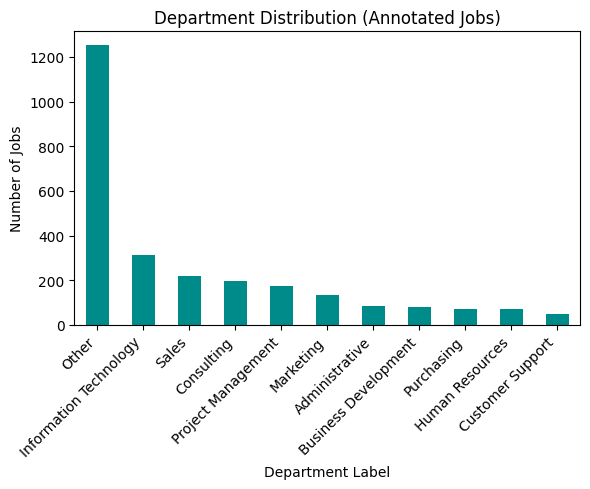

In [53]:
plt.figure(figsize=(6, 5))
dept_counts.plot(kind="bar", color="DarkCyan")
plt.title("Department Distribution (Annotated Jobs)")
plt.ylabel("Number of Jobs")
plt.xlabel("Department Label")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The department labels are highly imbalanced. Nearly half of all job entries (≈47%) are labeled as *Other*, while several departments such as *Customer Support*, *Human Resources*, and *Purchasing* account for less than 3% each.

*Other* being almost half the dataset implies that many job titles are not mapped cleanly to predefined departments, keyword lists can therefore over-predict *Other*.
Furthermore, rare classes such as *Customer Support* lack sufficient keyword coverage compared to others such as *Information Technology* whereby accuracy can vary strongly by class.

This imbalance indicates that department prediction might be a challenging task for the rule-based matching approach

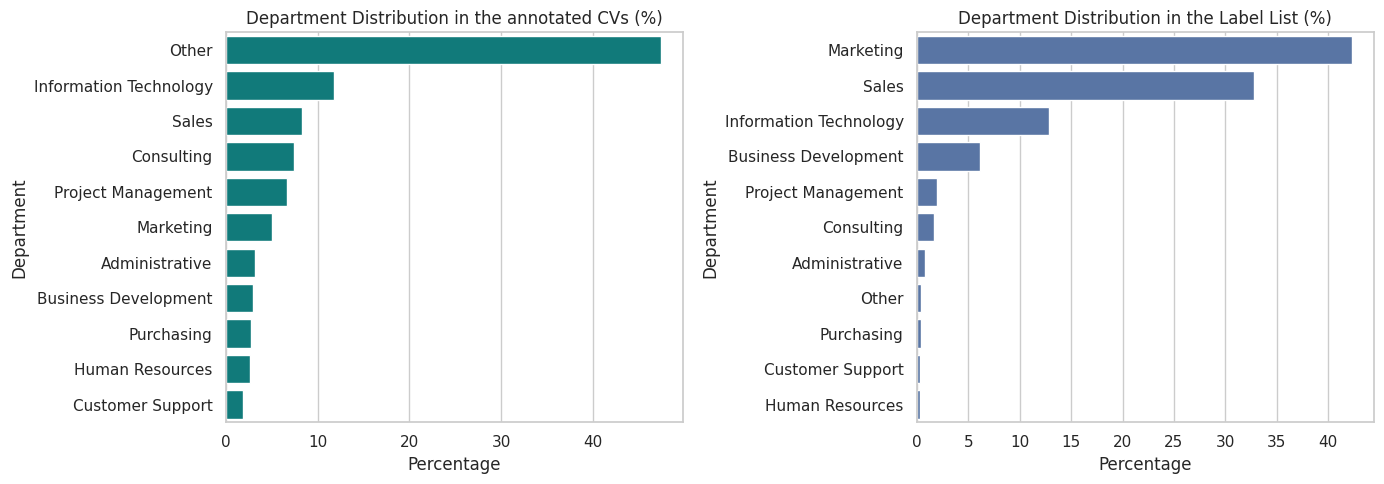

In [54]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot: Department CVs percentages
sns.barplot(
    x=dept_percent.values,
    y=dept_percent.index,
    color='DarkCyan',
    ax=axes[0]
)
axes[0].set_title("Department Distribution in the annotated CVs (%)")
axes[0].set_xlabel("Percentage")
axes[0].set_ylabel("Department")

# Right subplot: Department Label List percentages
sns.barplot(
    x=dep_percentages.values,
    y=dep_percentages.index,
    ax=axes[1]
)
axes[1].set_title("Department Distribution in the Label List (%)")
axes[1].set_xlabel("Percentage")
axes[1].set_ylabel("Department")

plt.tight_layout()
plt.show()

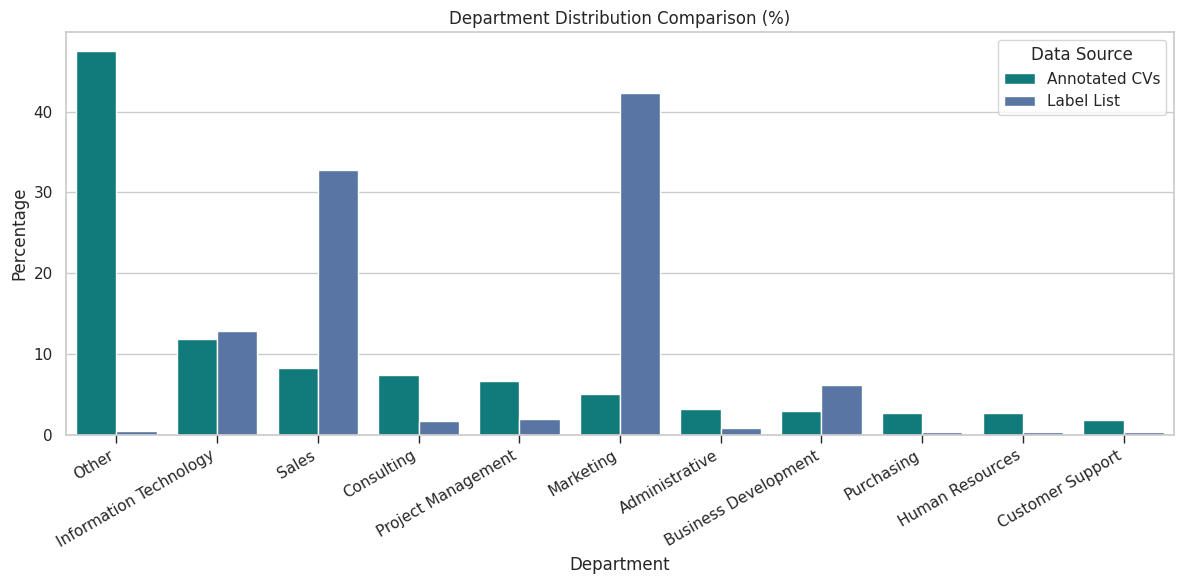

In [55]:
sns.set(style="whitegrid")

df = pd.concat(
    [
        dept_percent.rename("Annotated CVs"),
        dep_percentages.rename("Label List")
    ],
    axis=1
).fillna(0)

df = df.reset_index().rename(columns={"index": "Department"})

df_long = df.melt(
    id_vars="Department",
    var_name="Source",
    value_name="Percentage"
)

palette = {
    "Annotated CVs": "DarkCyan",
    "Label List": "#4C72B0"
}

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_long,
    x="Department",
    y="Percentage",
    hue="Source",
    palette=palette
)

plt.title("Department Distribution Comparison (%)")
plt.xlabel("Department")
plt.ylabel("Percentage")
plt.legend(title="Data Source")

plt.xticks(rotation=30, ha="right")

ax = plt.gca()
ax.tick_params(
    axis="x",
    which="major",
    bottom=True,
    length=6,
    width=1
)

plt.tight_layout()
plt.show()

The annotated CV data and the Label List have the same departments.
Departments are very imbalanced for both data. There are few departments that have a much higher percentage. However they are different for the CV data and the Label List: for the CV data the label Other dominates, while for the Label List it is Marketing. Sales and Information Technology is strong for both. The undefined label Other is much less common in the Label List than it is in the CV data.

**Is each unique job assigned to exactly one department? ( in Label List):**

In [56]:
labellist_title_department_counts = (
    department_df
    .groupby("text")["label"]
    .nunique()
    .sort_values(ascending=False)
)

In [57]:
labellist_title_department_counts.value_counts().sort_index()

,count
label,
1,10145


Each job title in the department Label List is assigned to exactly one label which shows us that that job titles are not ambiguous across the departments

**Is each unique job assigned to exactly one department? ( in annotated CV dataset):**

In [58]:
title_department_counts = (
    eda_df
    .groupby("position")["department"]
    .nunique()
    .sort_values(ascending=False)
)

In [59]:
title_department_counts.value_counts().sort_index()

,count
department,
1,2065
2,1


In [60]:
multi_department_titles = title_department_counts[title_department_counts > 1]
titlemulti = multi_department_titles.index[0]

eda_df[eda_df["position"] == titlemulti][["position", "department"]].drop_duplicates()

,position,department
32,Kaufmännischer Leiter,Sales
1335,Kaufmännischer Leiter,Administrative


- 2.065 job titles appear in exactly 1 department
- only 1 job title (Kaufmännischer Leiter) appears in 2 departments (Sales and Administrative)
- no job title appears in more than two departments

This tells us that job titles are not ambiguous across departments, but each job is linked to exactly one department (except for one exception)

## 2.2 Seniority distribution

Next we will take a look at the distribution of the seniority levels and understand how balanced or imbalanced the seniority levels are distributed.

This is especially important since seniority is another one of our target variables and its distribution helps us understand the difficulty of the prediction task.

In [61]:
sen_counts = eda_df["seniority"].value_counts()
sen_counts

,count
seniority,
Professional,1219
Lead,460
Management,418
Junior,230
Senior,170
Director,141


In [62]:
sen_percent = sen_counts / sen_counts.sum() * 100
sen_percent.round(2)

,count
seniority,
Professional,46.21
Lead,17.44
Management,15.85
Junior,8.72
Senior,6.44
Director,5.34


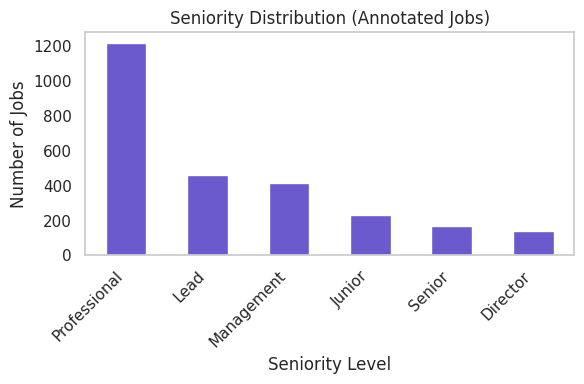

In [97]:
plt.figure(figsize=(6, 4))
sen_counts.plot(kind="bar", color='SlateBlue')
plt.title("Seniority Distribution (Annotated Jobs)")
plt.ylabel("Number of Jobs")
plt.xlabel("Seniority Level")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(False)
plt.show()

Seniority distribution also shows an imbalance, but less extreme than department:
- One dominant class: Professional (~46%)
- Distribution is skewed toward mid-career roles (Professional, Lead, Management), very early (Junior) and very late (Director) roles are rarer
- No class is vanishingly small (all >5%)

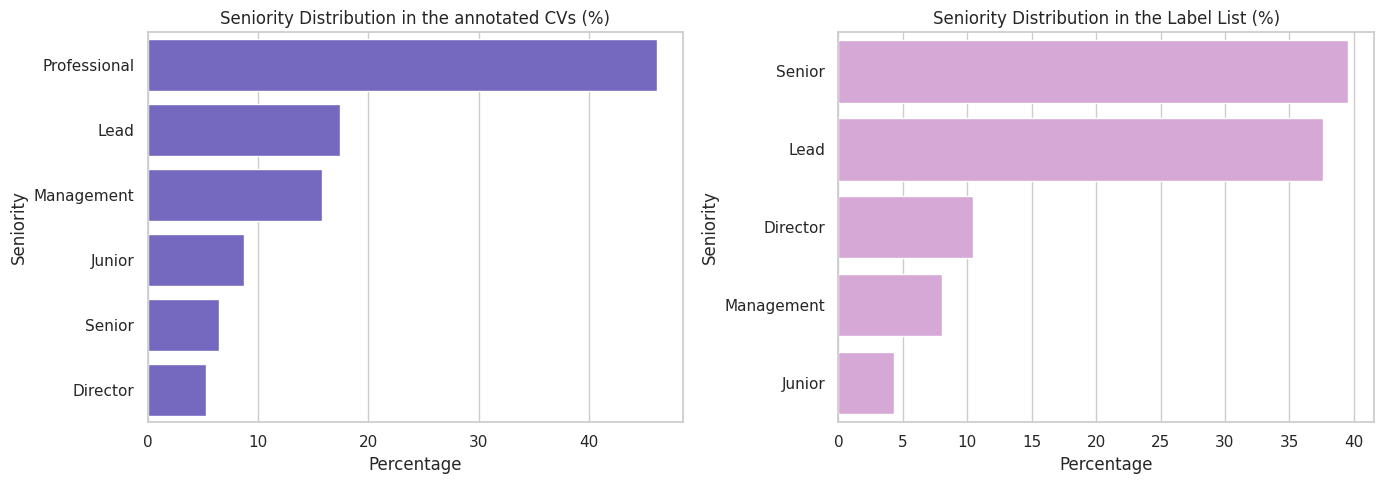

In [64]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot: Seniority percentages in annotated CV data
sns.barplot(
    x=sen_percent.values,
    y=sen_percent.index,
    color='SlateBlue',
    ax=axes[0]
)
axes[0].set_title("Seniority Distribution in the annotated CVs (%)")
axes[0].set_xlabel("Percentage")
axes[0].set_ylabel("Seniority")

# Right subplot: Seniority percentages in Label List
sns.barplot(
    x=sen_percentages.values,
    y=sen_percentages.index,
    ax=axes[1],
    color='Plum'
)
axes[1].set_title("Seniority Distribution in the Label List (%)")
axes[1].set_xlabel("Percentage")
axes[1].set_ylabel("Seniority")

plt.tight_layout()
plt.show()

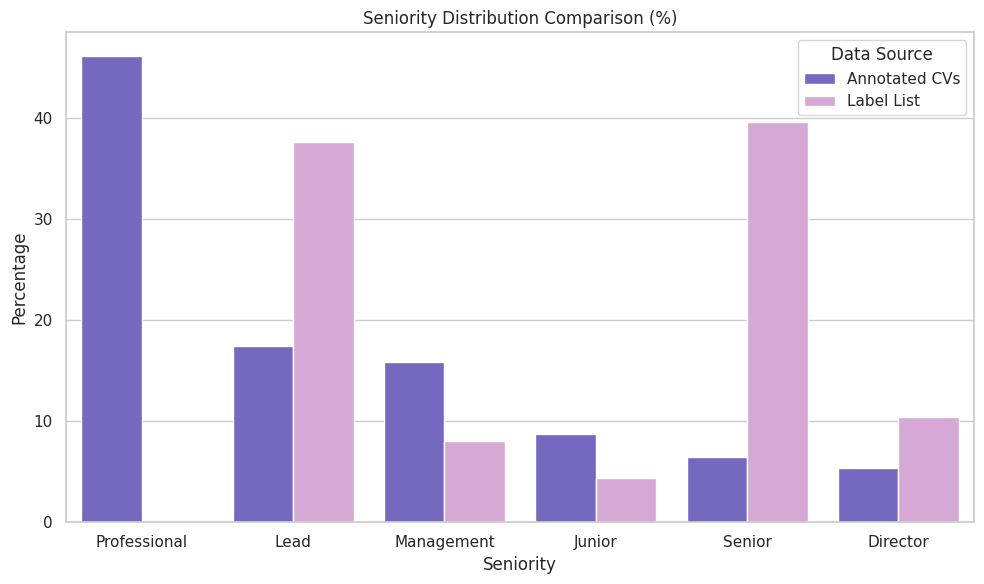

In [65]:
sns.set(style="whitegrid")

df = pd.concat(
    [
        sen_percent.rename("Annotated CVs"),
        sen_percentages.rename("Label List")
    ],
    axis=1
).fillna(0)

df = df.reset_index().rename(columns={"index": "Seniority"})

df_long = df.melt(
    id_vars="Seniority",
    var_name="Source",
    value_name="Percentage"
)

palette = {
    "Annotated CVs": "SlateBlue",
    "Label List": "Plum"
}

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_long,
    x="Seniority",
    y="Percentage",
    hue="Source",
    palette=palette
)

plt.title("Seniority Distribution Comparison (%)")
plt.xlabel("Seniority")
plt.ylabel("Percentage")
plt.legend(title="Data Source")
plt.tight_layout()
plt.show()

The plots show a big discrepancy: we have a seniority label missing in the Seniority Label List. The label *Professional* is completely absend from the Label List. This is especially problematic since *Professional* is the most common Label in the CV data.
Overall the distribution of seniority labels is more balanced compared to the distribution of department labels.

## 2.3 Job Status Distribution


We now take a look at the status distribution. This is important as our prediciton will be based on the characteristics of the current job, meaning where the status is active.
We want to understand how many active jobs there are in the data and whether CVs have multiple active jobs.

In [66]:
status_counts = eda_df["status"].value_counts()
status_percent = status_counts / status_counts.sum() * 100

In [67]:
status_counts

,count
status,
INACTIVE,1897
ACTIVE,623
UNKNOWN,118


In [68]:
status_percent.round(2)

,count
status,
INACTIVE,71.91
ACTIVE,23.62
UNKNOWN,4.47


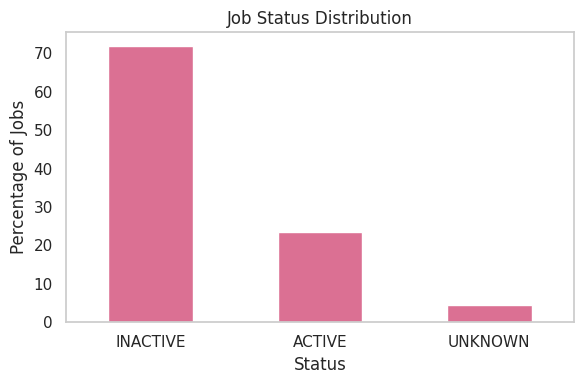

In [69]:
plt.figure(figsize=(6, 4))
status_percent.plot(kind="bar", color='PaleVioletRed')
plt.title("Job Status Distribution")
plt.ylabel("Percentage of Jobs")
plt.xlabel("Status")
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

We can clearly see that most jobs are inactive and historical, given by the fact that ~72% of all job entries are of status inactive. This however is a logical consequence of CV data and confirms to us that the CVs contain rich career history.

Approximately 24% of jobs are labeled as active, while a small fraction (≈4.5%) have status unknown likely due to incomplete temporal metadata.

Our first intuition based on common sense and also based on the data (24% of jobs are labeled as active) is that there is 1 active job per CV. To support this intuition we take a look at the distribution of active jobs per CV:

In [70]:
active_jobs_per_cv_full = (
    eda_df
    .groupby("cv_id")["status"]
    .apply(lambda x: (x == "ACTIVE").sum())
)

In [71]:
active_jobs_per_cv_full.value_counts().sort_index()

,count
status,
0,131
1,380
2,78
3,10
4,3
5,4
7,1
8,1
10,1


Most CVs (380) have exactly 1 active job and represents the largest group.
However, we also have a high amount of CVs (131) without a current job.
Some have 2 (78) or 3 (10), and there are some minor edge cases with a maximum 10 current jobs in a CV.

Conditioned on CVs that contain at least one ACTIVE job, we further examine how many concurrent ACTIVE jobs exist per CV to assess the prevalence of multi-role cases:

In [72]:
active_jobs_per_cv = (
    eda_df[eda_df["status"] == "ACTIVE"]
    .groupby("cv_id")
    .size()
)

active_jobs_per_cv.describe()

,0
count,478.000000
mean,1.303347
std,0.833037
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,10.000000


- there are 478 CVs that have at least 1 active job
- the mean active job per CV is 1.3 and the median is 1 active job per CV
- there is a Maximum of 10 active jobs per CV

-> most CVs have exactly one active job, while multiple active jobs are a minority case

In [73]:
active_jobs_per_cv.value_counts().sort_index()

,count
1,380
2,78
3,10
4,3
5,4
7,1
8,1
10,1


- 380 CVs have exactly 1 active job
- only 98 CVs have more than 1 active job

An analysis of the number of active jobs per CV shows that while most individuals (≈80%) have exactly one current position, a substantial minority have multiple active jobs. This indicates that the concept of a single current job is generally valid but not universal.

## 2.4 Department vs job status

In [74]:
pd.crosstab(
    eda_df["status"],
    eda_df["department"],
    normalize="index"
).round(3)

department,Administrative,Business Development,Consulting,Customer Support,Human Resources,Information Technology,Marketing,Other,Project Management,Purchasing,Sales
status,,,,,,,,,,,
ACTIVE,0.022,0.032,0.063,0.010,0.026,0.100,0.035,0.552,0.063,0.024,0.074
INACTIVE,0.032,0.031,0.079,0.022,0.026,0.127,0.057,0.438,0.071,0.030,0.089
UNKNOWN,0.076,0.000,0.051,0.008,0.034,0.085,0.017,0.661,0.017,0.008,0.042


Status **active** clearly shows a dominance of department Other. After that, IT and Sales are the strongest specific departments. This suggests that current job titles often lack strong department specific signal.

Status **inactive** also has Other dominating but less extreme percentage wise and shows more diversity across departments. Historical jobs show broader departmental diversity than current roles.

Status **unknown** is extremely dominated by Other and has a sparse representation elsewhere. These unknown status jobs lack sufficient structure for reliable department inference.

Overall, the distribution of department labels differs by job status. Active jobs are strongly dominated by the Other category, whereas inactive jobs exhibit greater departmental diversity.

## 2.5 Seniority vs job status

In [75]:
pd.crosstab(
    eda_df["status"],
    eda_df["seniority"],
    normalize="index"
).round(3)


seniority,Director,Junior,Lead,Management,Professional,Senior
status,,,,,,
ACTIVE,0.055,0.019,0.201,0.308,0.347,0.071
INACTIVE,0.055,0.114,0.167,0.104,0.495,0.064
UNKNOWN,0.017,0.017,0.153,0.237,0.542,0.034


among active jobs:
- Professional  34.7%
- Management   30.8%
- Lead         20.1%
- Senior        7.1%
- Director      5.5%
- Junior        1.9%

**Active** jobs are strongly skewed toward mid to high seniority levels. Junior roles are rare among current jobs. Management + Lead together alone represent ≈51%. Current positions tend to represent later career stages.

Junior roles are much more common in **inactive** jobs. Earlier career stages are more prevalent in past positions.

## 2.6 How often people change departments

We want to analyse if we can assume that it is rather unlikely that persons change the department over time.

Note that we explained before in our data that the job order is:
- job_index = 0 is the most recent job
- higher job_index = older job

In [76]:
def count_department_changes(cv_df):
    cv_df = cv_df.sort_values("job_index")
    return (cv_df["department"] != cv_df["department"].shift()).sum() - 1

- We compare each job to the previous one
- Count how often the department changes
- Subtract 1 because the first job has no previous comparison

In [77]:
department_changes_per_cv = (
    eda_df
    .groupby("cv_id")
    .apply(count_department_changes)
)

/tmp/ipython-input-2448362840.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_department_changes)


In [78]:
department_changes_per_cv.describe()

,0
count,609.000000
mean,1.530378
std,2.165705
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,24.000000


- Median = 1 department change → most people change department once
- 25% have 0 changes → strong department stability for a large subset
- Mean > median → skewed by a small number of highly mobile careers
- Max = 24 → extreme outlier case, but not representative

In [79]:
department_changes_per_cv.value_counts().sort_index()

,count
0,288
1,94
2,78
3,57
4,31
5,25
6,21
7,4
8,7
9,2


Strong stability for many people
- 288 CVs (≈47%) never change department
- 382 CVs (≈63%) change at most once

-> Strong stability for many people. This supports the assumption of department stability for most people

-> But department change is not completely rare, ~37% changed department multiple times

An analysis of department transitions over time shows that nearly half of all individuals never change departments, and approximately two-thirds change department at most once throughout their recorded career history. While department changes do occur, particularly for a subset of highly mobile careers, the overall pattern indicates substantial departmental stability.

## 2.7 Seniority progression over time

For that we map seniority manually to an ordinal scale:
- Junior = 0
- Professional = 1
- Senior = 2
- Lead = 3
- Management = 4
- Director = 5

In [80]:
seniority_order = {
    "Junior": 0,
    "Professional": 1,
    "Senior": 2,
    "Lead": 3,
    "Management": 4,
    "Director": 5
}

eda_df["seniority_level"] = eda_df["seniority"].map(seniority_order)

we check seniority changes between consecutive jobs:

In [81]:
# make sure ordering is correct within each cv
d = eda_df.sort_values(["cv_id", "job_index"]).copy()

# previous seniority per cv
d["prev_seniority_level"] = d.groupby("cv_id")["seniority_level"].shift(-1)

# a "position change" is any row that has a previous row in the same cv
d["is_change"] = d["prev_seniority_level"].notna()

# increase on that change
d["seniority_increase"] = d["seniority_level"] > d["prev_seniority_level"]

# overall counts
total_changes = int(d["is_change"].sum())
increase_changes = int((d["is_change"] & d["seniority_increase"]).sum())
share = increase_changes / total_changes if total_changes else float("nan")

total_changes, increase_changes, share

(2029, 631, 0.310990635781173)

In [82]:
d

,cv_id,job_index,organization,position,startDate,endDate,status,department,seniority,seniority_level,prev_seniority_level,is_change,seniority_increase
0,0,0,Depot4Design GmbH,Prokurist,2019-08,None,ACTIVE,Other,Management,4,4.0,True,False
1,0,1,Depot4Design GmbH,CFO,2019-07,None,ACTIVE,Other,Management,4,1.0,True,True
2,0,2,Depot4Design GmbH,Betriebswirtin,2019-07,None,ACTIVE,Other,Professional,1,4.0,True,False
3,0,3,Depot4Design GmbH,Prokuristin,2019-07,None,ACTIVE,Other,Management,4,4.0,True,False
4,0,4,Depot4Design GmbH,CFO,2019-07,None,ACTIVE,Other,Management,4,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,607,1,Bistum,Justitiar,2014-03,None,ACTIVE,Other,Professional,1,4.0,True,False
2634,607,2,FORESTA Management,Geschäftsführer,2010-01,None,ACTIVE,Other,Management,4,4.0,True,False
2635,607,3,Malteser Hilfsdienst,Präsidium,1999,None,ACTIVE,Other,Management,4,1.0,True,True
2636,607,4,Spies & Brunner RAe,Rechtsanwalt,1995-01,None,ACTIVE,Other,Professional,1,NaN,False,False


<Axes: xlabel='delta'>

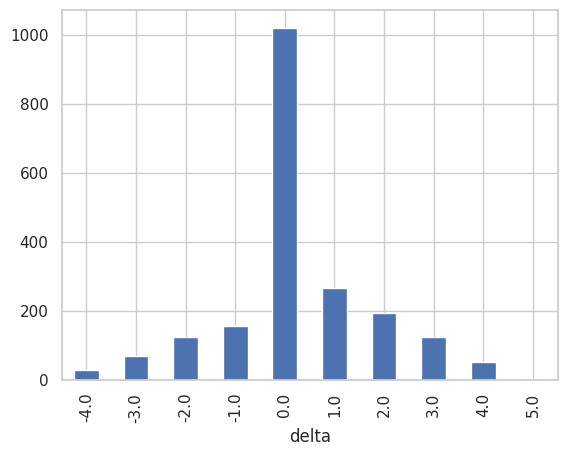

In [83]:
d["delta"] = d["seniority_level"] - d["prev_seniority_level"]
delta_counts = d["delta"].value_counts().sort_index()
delta_counts.plot.bar()

- stability dominates
- decreases and increases exist, but are less than stability
- there are more increases than decreases

-> seniority tends to be stable with occasional upward or downward transitions

An analysis of seniority transitions between consecutive jobs shows that most career moves are lateral, with seniority remaining unchanged in the majority of cases. Upward and downward transitions do occur, with updward transitions being more common than downward transitions.

## 2.8 Job Title

Since all our baseline and ML approaches use the job titles as predictor, we must understand their overall structure:
- how long they are
- how diverse / noisy they are linguistically

### 2.8.1 Job title length distribution

Job title length tells us:
- how much information is available per sample
- whether titles are mostly short or descriptive
- Short titles → ambiguous
- Long titles → richer signal but noisier

we measure:
- number of characters
- number of words (word count is usually more interpretable)

**Annotated CV data:**

In [84]:
eda_df["title_word_count"] = eda_df["position"].str.split().str.len()

eda_df["title_word_count"].describe()

,title_word_count
count,2638.000000
mean,3.044731
std,2.124734
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,17.000000


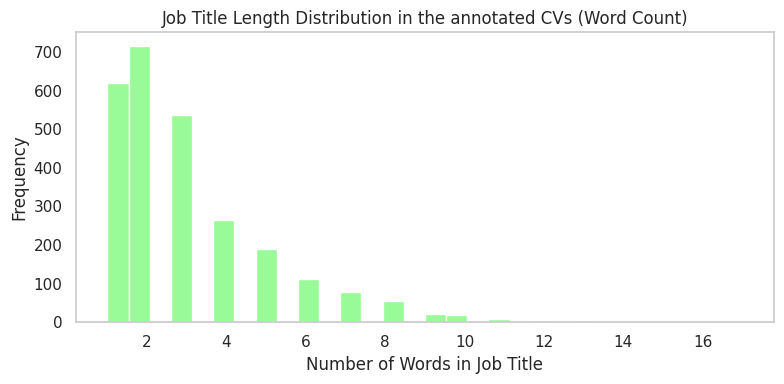

In [85]:
plt.figure(figsize=(8, 4))
eda_df["title_word_count"].hist(
    bins=30,
    color="PaleGreen"
)
plt.title("Job Title Length Distribution in the annotated CVs (Word Count)")
plt.xlabel("Number of Words in Job Title")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()

- Most job titles are short (1-3 words)
- At least 50% of titles have only 1–2 words
- At least 75% have ≤4 words
- A non-trivial number are single-word titles or have very long titles (max 17)
- Mean is 3 words

**Department Label List:**

In [86]:
department_df["title_word_count"] = department_df["text"].str.split().str.len()

department_df["title_word_count"].describe()

,title_word_count
count,10145.000000
mean,4.263677
std,1.945473
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,28.000000


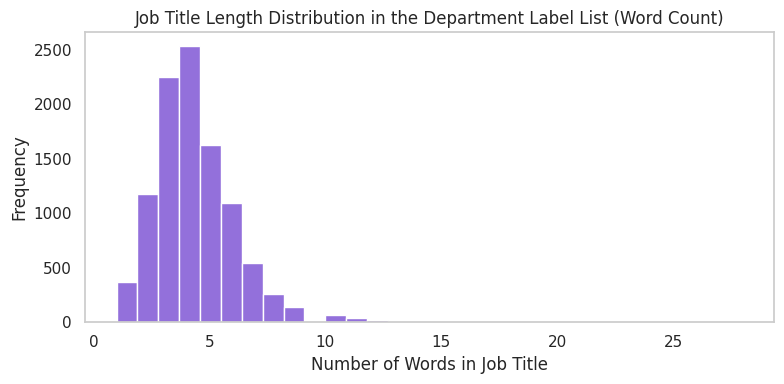

In [87]:
plt.figure(figsize=(8, 4))
department_df["title_word_count"].hist(
    bins=30,
    color="MediumPurple"
)
plt.title("Job Title Length Distribution in the Department Label List (Word Count)")
plt.xlabel("Number of Words in Job Title")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()

- Most job titles are short (2-5 words)
- At least 75% have ≤5 words
- A non-trivial number are single-word titles or have very long titles (max 28)
- Mean is 4 words

**Seniority Label List:**

In [88]:
seniority_df["title_word_count"] = seniority_df["text"].str.split().str.len()

seniority_df["title_word_count"].describe()

,title_word_count
count,9428.000000
mean,4.319474
std,1.917458
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,25.000000


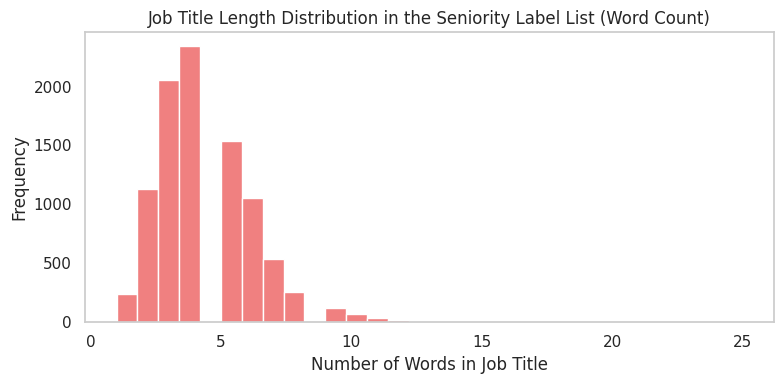

In [89]:
plt.figure(figsize=(8, 4))
seniority_df["title_word_count"].hist(
    bins=30,
    color="LightCoral"
)
plt.title("Job Title Length Distribution in the Seniority Label List (Word Count)")
plt.xlabel("Number of Words in Job Title")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()

- Most job titles are short (2-4 words)
- At least 75% have ≤5 words
- A non-trivial number are single-word titles or have very long titles (max 25)
- Mean is 4 words

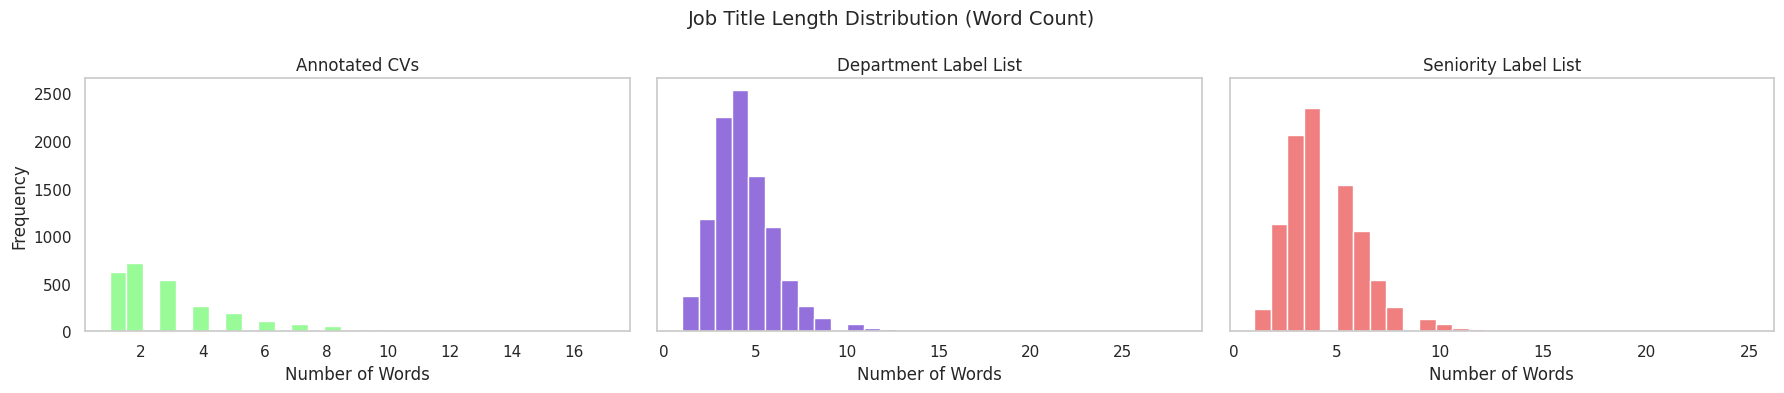

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# Plot 1: annotated CVs
axes[0].hist(
    eda_df["title_word_count"],
    bins=30,
    color="PaleGreen"
)
axes[0].set_title("Annotated CVs")
axes[0].set_xlabel("Number of Words")
axes[0].set_ylabel("Frequency")
axes[0].grid(False)

# Plot 2: department labels
axes[1].hist(
    department_df["title_word_count"],
    bins=30,
    color="MediumPurple"
)
axes[1].set_title("Department Label List")
axes[1].set_xlabel("Number of Words")
axes[1].grid(False)

# Plot 3: seniority labels
axes[2].hist(
    seniority_df["title_word_count"],
    bins=30,
    color="LightCoral"
)
axes[2].set_title("Seniority Label List")
axes[2].set_xlabel("Number of Words")
axes[2].grid(False)

plt.suptitle("Job Title Length Distribution (Word Count)", fontsize=14)
plt.tight_layout()
plt.show()

### 2.8.2 Language and character diversity of job titles

To not overkill the analysis, we begin by looking at a random sample of about 100 jobs to get an overall view on the diversity of languages and characters in the titles.

Looking at the sample, we primarily inspect the following:
- analyse if non-English titles exist
- look for special characters and whitespacing

**Annotated CVs**

In [91]:
eda_df["position"].sample(100, random_state=42).tolist()

['Design & Communications Manager',
 'Teamleiter Steuern',
 'Senior Financial Crimes Investigator',
 'Senior Electronics Engineer',
 'Financial Accountant',
 'Financial Analyst',
 'Night Shift Operator',
 'Associate Partner',
 'Projectorganisator',
 'Key Account / Project Manager',
 'Research Assistant',
 'officer',
 'Associate Consultant',
 'Technische Assistenz',
 'Kaufmännischer Leiter',
 'Management Consultant Information Security and Privacy',
 'Deputy Director "Cognitive Computing and Medical Imaging"',
 'Leistungssachbearbeiter SGB II',
 'stellvertretender Referatsleiter',
 'Teacher: History, Ethics, French',
 'Director',
 'Kfm. Leiter Niederlassung SüdWest der SPIE Energy Solutions GmbH',
 'Recruiter',
 'Maitre d’hotel Kieffer traiteur',
 'Blockchain Strategist',
 'Head of Logistics',
 'Fachlead / Professional Lead Bid & Offer Management',
 'Innovation Lead',
 'Versicherungskaufmann',
 'Managing Director Autotech Engineering (Shanghai), R&D Director China of BU Chassis and BiW,

- we have non-English titles (in this sample many are English and German)
- we have special characters (such as /, (), -, &) and whitespacing

We also check for non-ASCII characters

In [92]:
eda_df["contains_non_ascii"] = eda_df["position"].apply(
    lambda x: any(ord(c) > 127 for c in x)
)

eda_df["contains_non_ascii"].value_counts(normalize=True).round(3)

,proportion
contains_non_ascii,
False,0.889
True,0.111


- 88.9% → ASCII-only titles
- 11.1% → titles with non-ASCII characters

Approximately 11% of job titles contain non-ASCII characters, indicating the presence of non-English or language-specific titles. This linguistic diversity introduces additional variability and noise.

Non-ASCII characters typically indicate:
- non-English titles (e.g. German, French, Spanish)
- localized spellings (ä, ö, ü, ß, é, ñ, etc.)
- mixed-language titles

So this result tells us:
- At least ~11% of job titles are non-English or language-specific.
- This is a lower bound, not an upper bound: English titles can still exist in other languages and ASCII-only does not mean “English”

**Department Label List**

In [93]:
department_df["text"].sample(100, random_state=42).tolist()

['Global Key Account Manager',
 'Head of Field Sales',
 'Beratung und Marketing',
 'Director of Marketing & formitas Akademie',
 'Account Manager / Leiter Vertrieb',
 'Sales Director',
 'IT Manager SAP Mastére ME Management et stratégie d’entreprise',
 'International Horticultural Business Development | Agro Study Tours and Matchmaking | Agro Conference Services',
 'IT & DATA SPECIALIST',
 'Direktor Vertrieb',
 'Head of Area Sales Management',
 'IT System- und Netzwerkadministrator',
 'Head of Sales (Vertriebsleiter)',
 'Leitung Vertrieb Großhandel',
 'Business Development Mananger',
 'SAP Mittelstandsexperte External on behalf of S...',
 'Head of Sales & Product',
 'Vorstand Vertrieb und Supply Chain (COO)',
 'Corporate VP - Global Head of Marketing & Sales...',
 'Marketing / Presse',
 'Innendienstleiter Vertrieb Industrie',
 'Marketing Manager North Europe & Sales Manager Suisse',
 'Commercial Director | Responsible for Customer Success | Cobwebb Communications',
 'Team Leader | Oper

- we have non-English titles (in this sample many are English and German)
- we have special characters (such as /, (), -, &) and whitespacing

In [94]:
department_df["contains_non_ascii"] = department_df["text"].apply(
    lambda x: any(ord(c) > 127 for c in x)
)

department_df["contains_non_ascii"].value_counts(normalize=True).round(3)

,proportion
contains_non_ascii,
False,0.929
True,0.071


- 92.9% → ASCII-only titles
- 7.1% → titles with non-ASCII characters

Approximately 7% of job titles contain non-ASCII characters, indicating the presence of non-English or language-specific titles. This linguistic diversity introduces additional variability and noise, however the non-ascii amount is very small.

**Seniority Label List**

In [95]:
seniority_df["text"].sample(100, random_state=42).tolist()

['VP of Sales & Marketing Division',
 'Head of Service Department',
 'Lead Business Analyst',
 'Country Marketing Manager Germany & France',
 'Leiter Unternehmertum',
 'Abteilungsleiter Programm Management (Vertrieb/...',
 'Head of Sales and Projects - Textile B.U.',
 'Teamleiter CRM',
 'Mitarbeiter Vertriebssupport',
 'Head of Development',
 'Microsoft Dynamics NAV Entwicklung/ Consultant',
 'Head of New Business Development',
 'CEO& Inhaber',
 'Account Manager CRM',
 'Marketing und Vertriebsleitung',
 'Mitglied der Geschäftsführung',
 'Bereichsleiter Kommunikation/Marketing/Produktmanagement',
 'Leitung Vertrieb München',
 'Customer Experience & CRM Manager / Digital Channels',
 'Marketingleitung Mediaform Informationssysteme',
 'Vertriebsleitung Deutschland / Sales Director Germany',
 'Customer Marketing Manager DACH',
 'Lead Business Operations Analyst',
 'Sales Director / Vertriebsleiter',
 'SAP Consultant CRM',
 'Manager of Very Important Things',
 'Sales-Manager in Internal Sale

- we have non-English titles (in this sample many are English and German)
- we have special characters (such as /, (), -, &) and whitespacing

In [96]:
seniority_df["contains_non_ascii"] = seniority_df["text"].apply(
    lambda x: any(ord(c) > 127 for c in x)
)

seniority_df["contains_non_ascii"].value_counts(normalize=True).round(3)

,proportion
contains_non_ascii,
False,0.903
True,0.097


- 90.3% → ASCII-only titles
- 9.7% → titles with non-ASCII characters

Approximately 10% of job titles contain non-ASCII characters, indicating the presence of non-English or language-specific titles. This linguistic diversity introduces additional variability and noise, however the non-ascii amount is very small.

# 3. Evaluation Function (usable for each model)

We use the following metrics to evaluate and compare all approaches:

- **Accuracy:** shows the overall fraction of correctly classified samples
- **macro-averaged F1-Score:** is the harmonic mean of precision and recall, computed independently for each class and averaged across classes. This metric is particularly important due to the strong class imbalance in both department and seniority labels, as it ensures that performance on minority classes is weighted equally.
- **MAE:** measures the average absolute difference between predicted and true labels. It is only meaningful for ordinal or numerical labels (e.g. seniority levels), where it captures how far predictions deviate from the correct class on average; for nominal class labels, the metric is not applicable.

Together, these metrics allow us to assess how often each model is correct overall and how well it performs across all classes, including rare ones.

The function *evaluate_predictions* is created in utils for each model to use and computes the evaluation metrics.
Some approaches have different metrics (numbers or strings).
The function assigns None to the metric that cannot be computed for a model.
This ensures a consistent output structure across different models and label types.

# 4. Results comparison table

The *result_utils* are created for each model to use and to add their results. In the end we can therefore get a dataframe with each model and their corresponding results to allow comparison between approaches.

The results table captures and compares across:
- Model
- Target (department vs seniority)
- Metrics (accuracy, macro F1, MAE)

→ each row is one experiment